In [1]:
import sys
sys.path.append('../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_preprocessing import DataProcessor

# Initialize DataProcessor
data_path = '../data/raw/data.csv'
processor = DataProcessor(data_path)

# Load and preprocess the data
processor.load_data()
processor.preprocess_data()

# Get the preprocessed data
data = processor.data

# Descriptive statistics
print("Descriptive statistics:")
print(data.describe())

Data loaded successfully from ../data/raw/data.csv
Data preprocessing completed.
Descriptive statistics:
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.10434


Class distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64


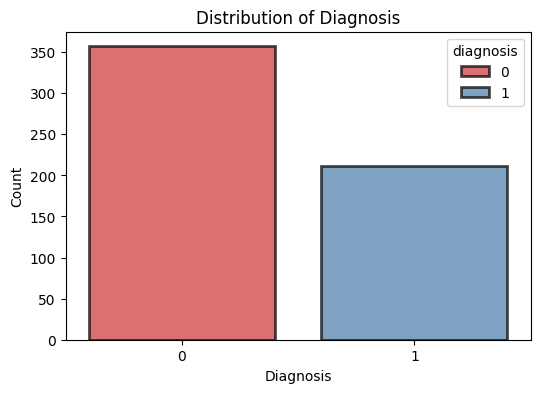

In [28]:
# Check for class imbalance
print("\nClass distribution:")
print(data['diagnosis'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data, palette='Set1', edgecolor='black', alpha=0.7, linewidth=2, hue='diagnosis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.savefig('../images/EDA/diagnosis_distribution.png')
plt.show()

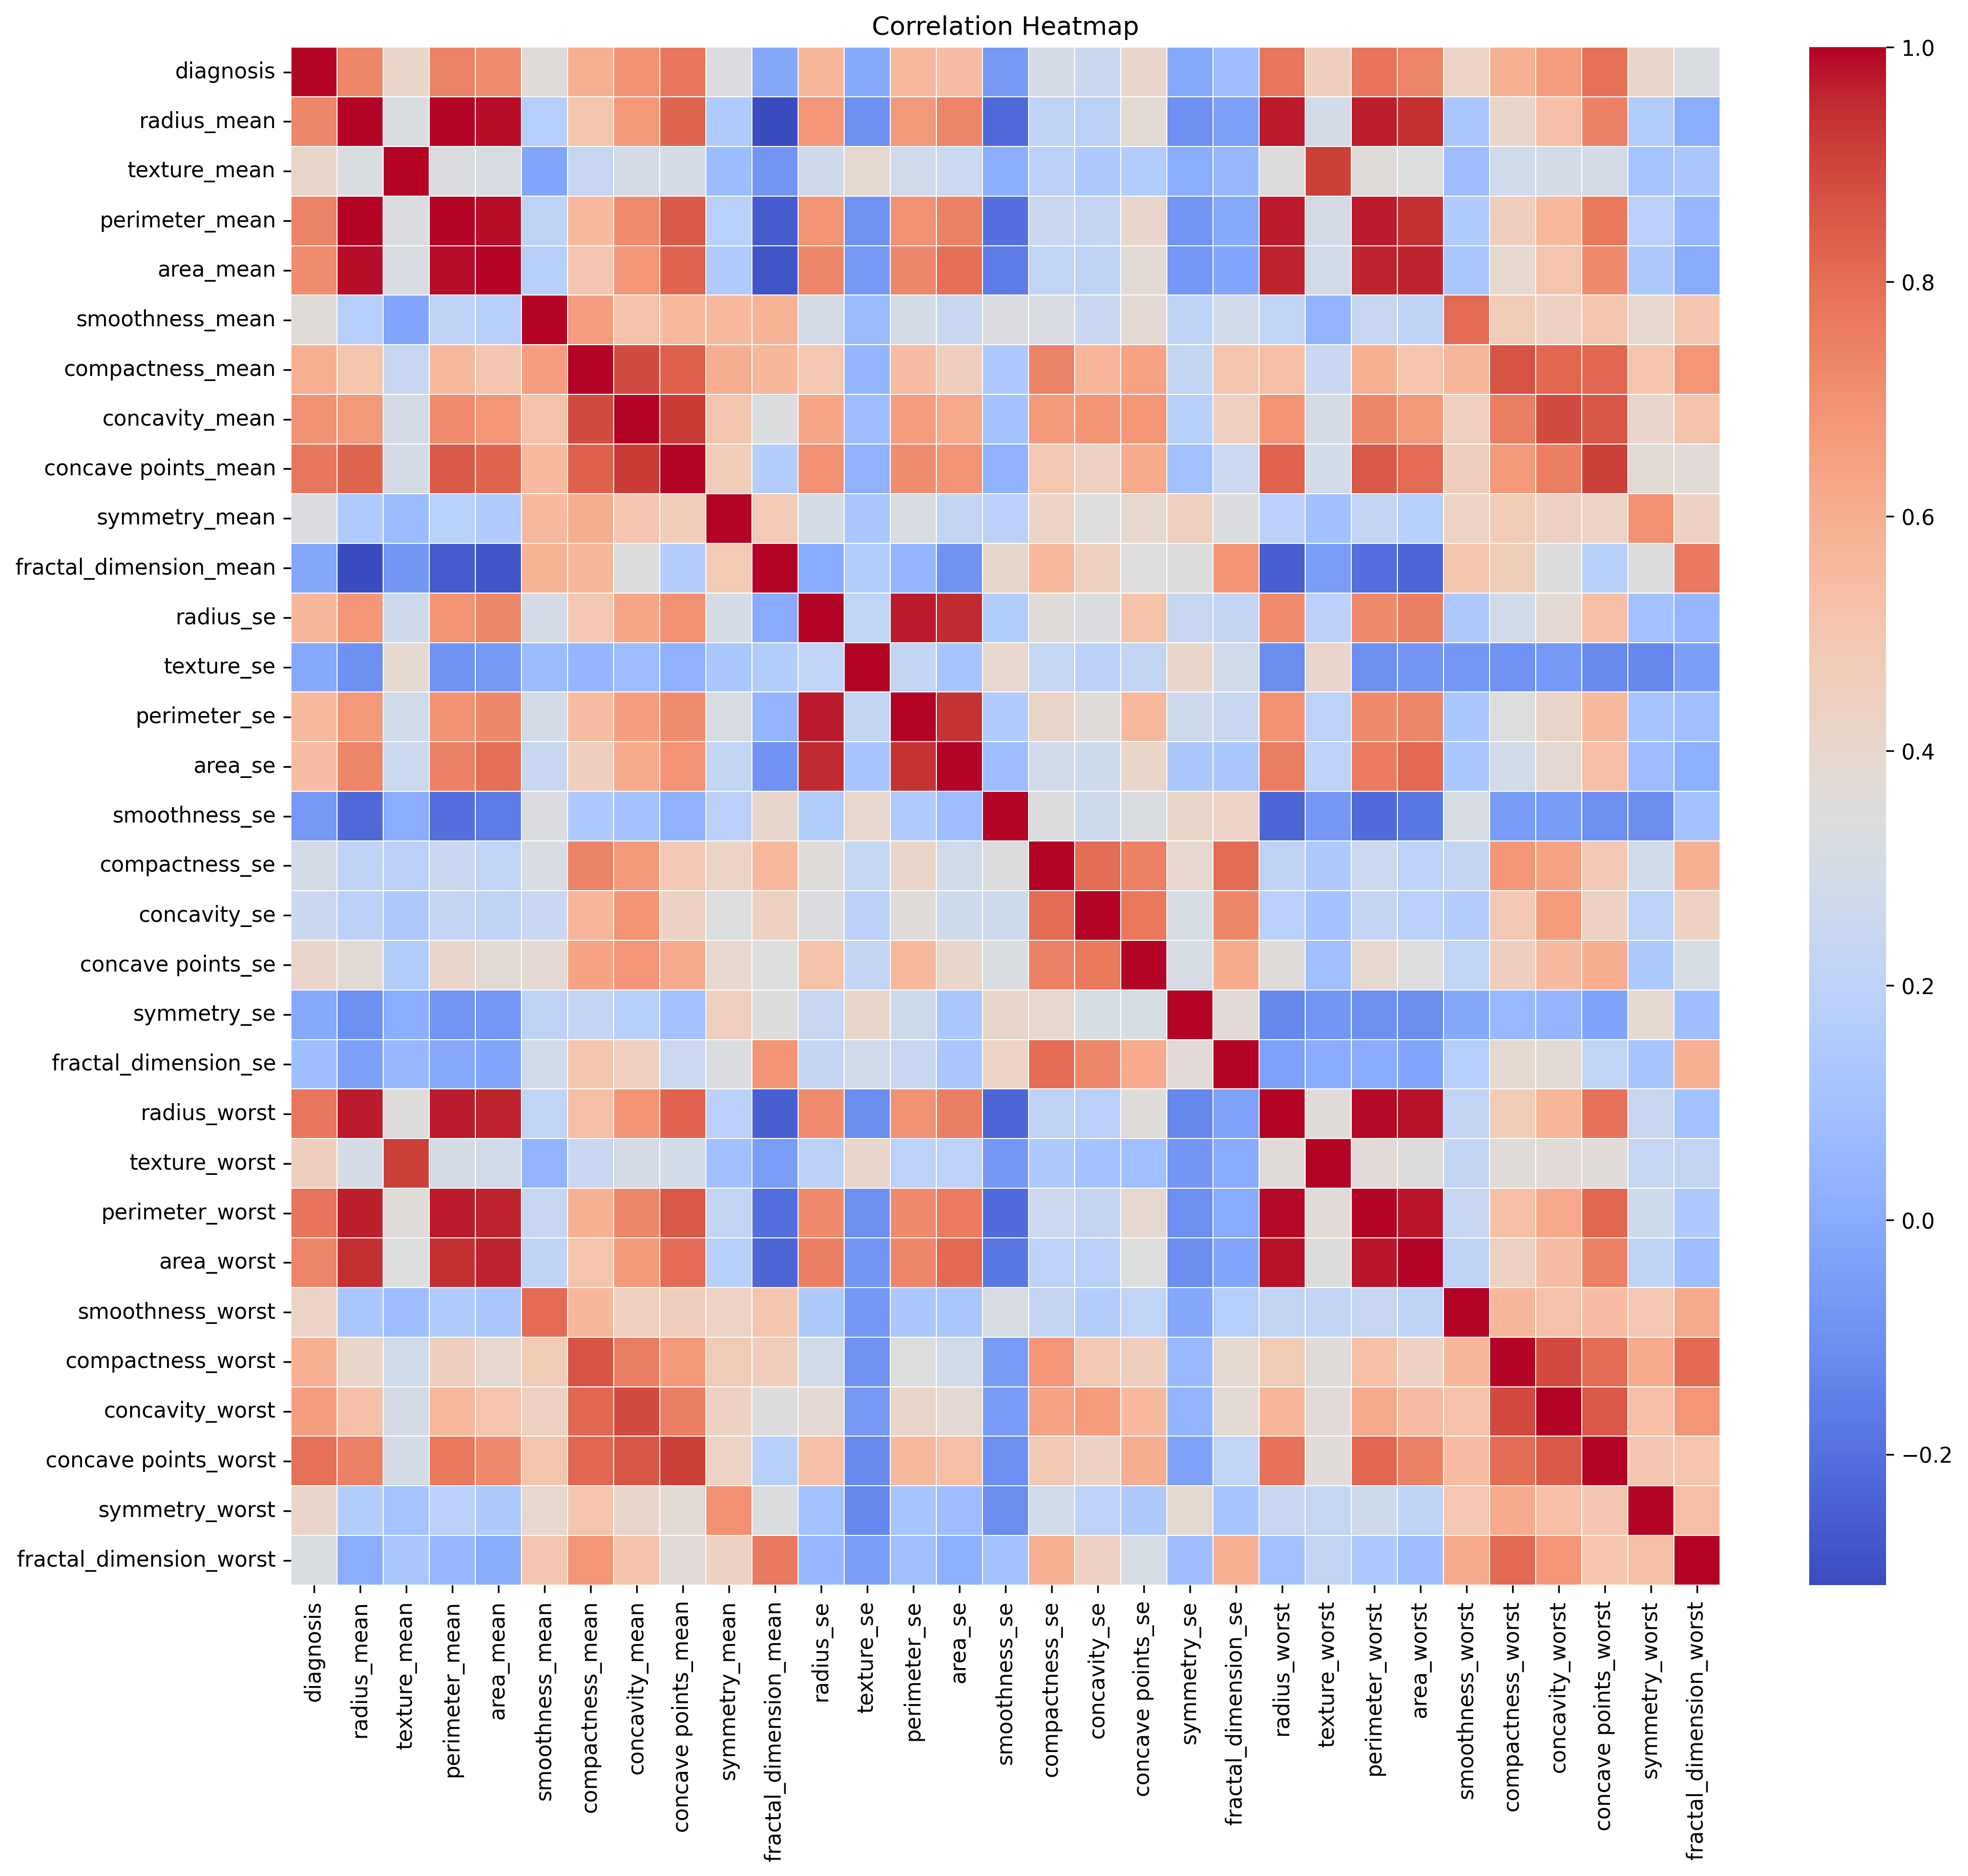

In [16]:
# Compute correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 13), dpi=300)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.4)
plt.title('Correlation Heatmap')
plt.savefig('../images/EDA/correlation_heatmap.png')
plt.show()

In [29]:
# Analyze highly correlated features
highly_correlated = corr_matrix[abs(corr_matrix) > 0.9]

# Remove the diagonal and lower triangle
highly_correlated = highly_correlated.stack().reset_index()
highly_correlated = highly_correlated[highly_correlated['level_0'] != highly_correlated['level_1']]
highly_correlated = highly_correlated.drop_duplicates(subset=0, keep='first')

# Sort by correlation value
highly_correlated = highly_correlated.sort_values(by=0, ascending=False)
print("\nHighly correlated features:")
print(highly_correlated)


Highly correlated features:
                level_0               level_1         0
2           radius_mean        perimeter_mean  0.997855
50         radius_worst       perimeter_worst  0.993708
3           radius_mean             area_mean  0.987357
11       perimeter_mean             area_mean  0.986507
51         radius_worst            area_worst  0.984015
59      perimeter_worst            area_worst  0.977578
31            radius_se          perimeter_se  0.972794
13       perimeter_mean       perimeter_worst  0.970387
4           radius_mean          radius_worst  0.969539
12       perimeter_mean          radius_worst  0.969476
5           radius_mean       perimeter_worst  0.965137
18            area_mean          radius_worst  0.962746
20            area_mean            area_worst  0.959213
19            area_mean       perimeter_worst  0.959120
32            radius_se               area_se  0.951830
14       perimeter_mean            area_worst  0.941550
6           radius_

C:\Users\moham\AppData\Local\Temp\ipykernel_9900\2030443567.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Benign (0)', 'Malignant (1)'])
C:\Users\moham\AppData\Local\Temp\ipykernel_9900\2030443567.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Benign (0)', 'Malignant (1)'])
C:\Users\moham\AppData\Local\Temp\ipykernel_9900\2030443567.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Benign (0)', 'Malignant (1)'])
C:\Users\moham\AppData\Local\Temp\ipykernel_9900\2030443567.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Benign (0)', 'M

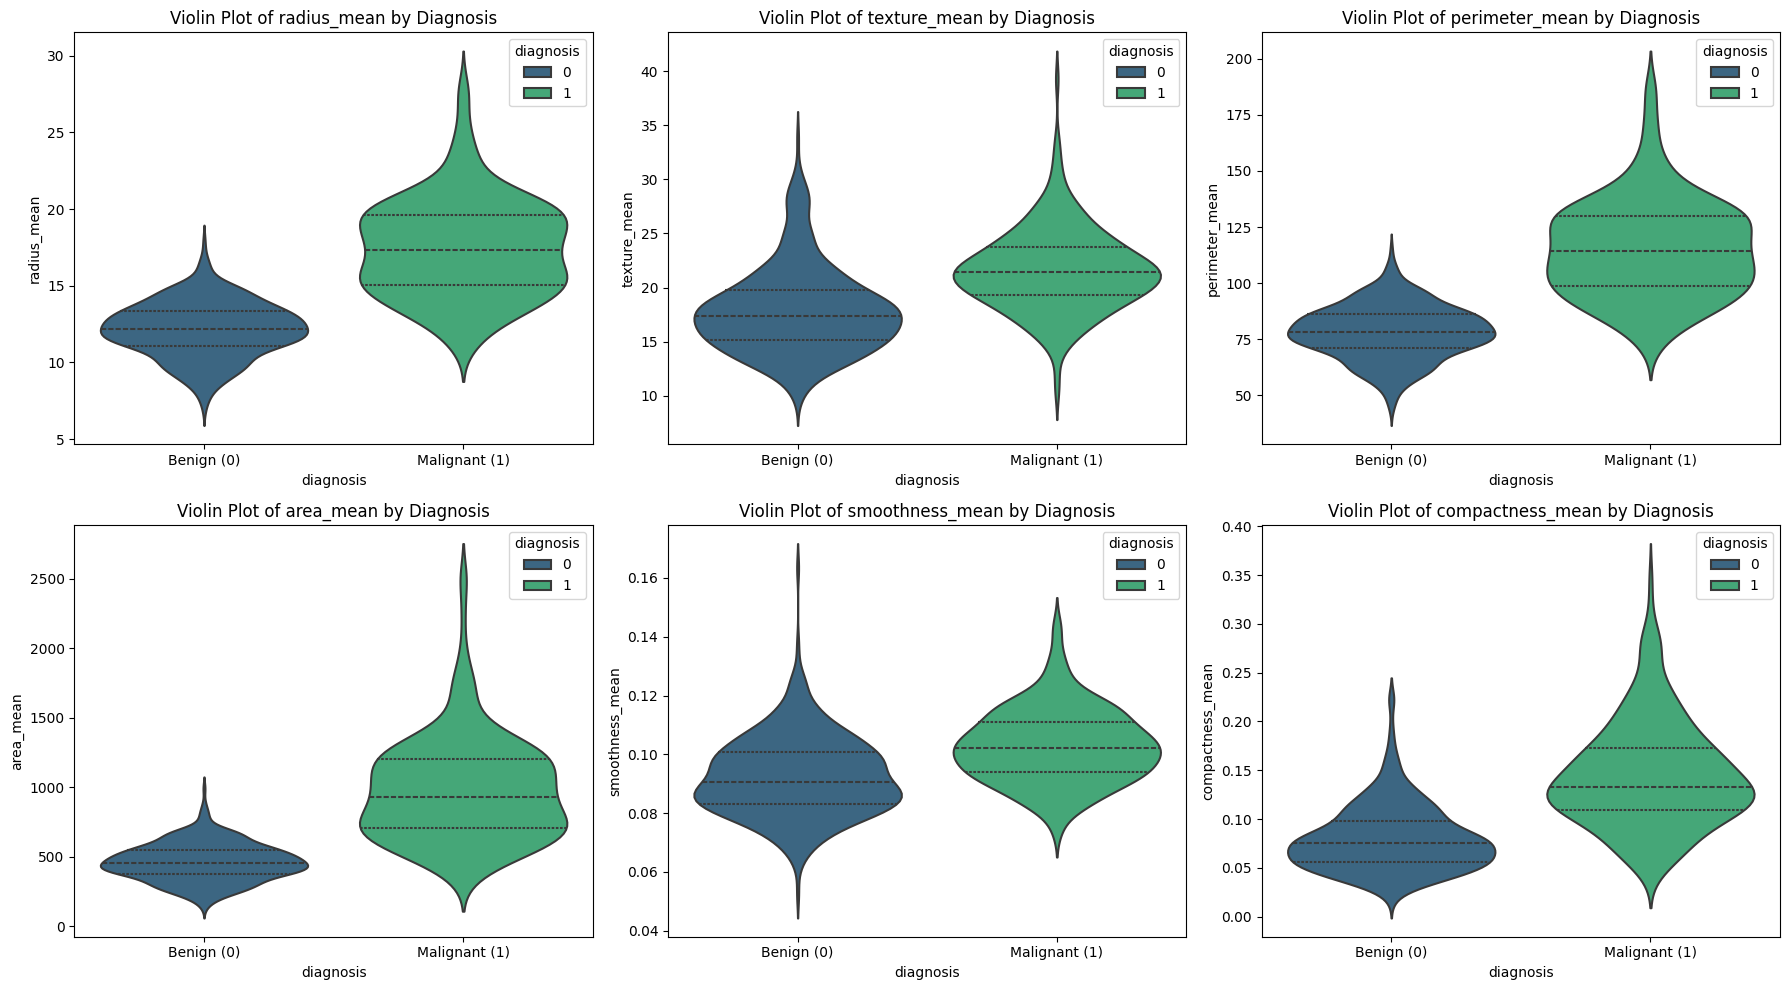

In [10]:
# Setting up the figure for violin plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.ravel()

# Features to plot
features_to_violin = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']

# Creating violin plots
for i, feature in enumerate(features_to_violin):
    sns.violinplot(x='diagnosis', y=feature, data=data, ax=axes[i], palette='viridis', inner="quartile", linewidth=1.5, hue='diagnosis')
    axes[i].set_title(f'Violin Plot of {feature} by Diagnosis')
    axes[i].set_xticklabels(['Benign (0)', 'Malignant (1)'])

# Adjusting layout and removing empty subplot
plt.tight_layout()
plt.show()


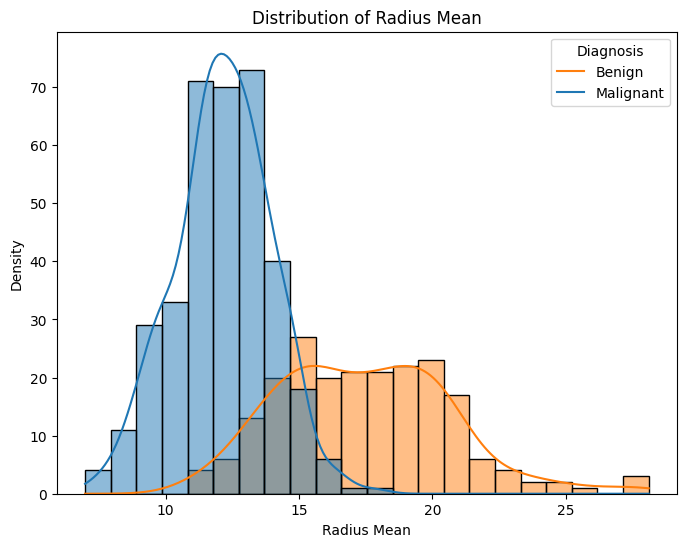

In [31]:
# Function to visualize the distribution of features
def feature_distribution(data, feature_names): 
    for feature in feature_names:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=data, x=feature, kde=True, hue='diagnosis')
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Density")
        plt.legend(title="Diagnosis", labels=["Benign", "Malignant"])
        plt.savefig(f'../images/EDA/feature_distribution/dist_{feature}.png')
        plt.close()

feature_distribution(data, data.columns[2:])

# Show one of the plots
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='radius_mean', kde=True, hue='diagnosis')
plt.title("Distribution of Radius Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Density")
plt.legend(title="Diagnosis", labels=["Benign", "Malignant"])
plt.show()

<Figure size 1200x800 with 0 Axes>

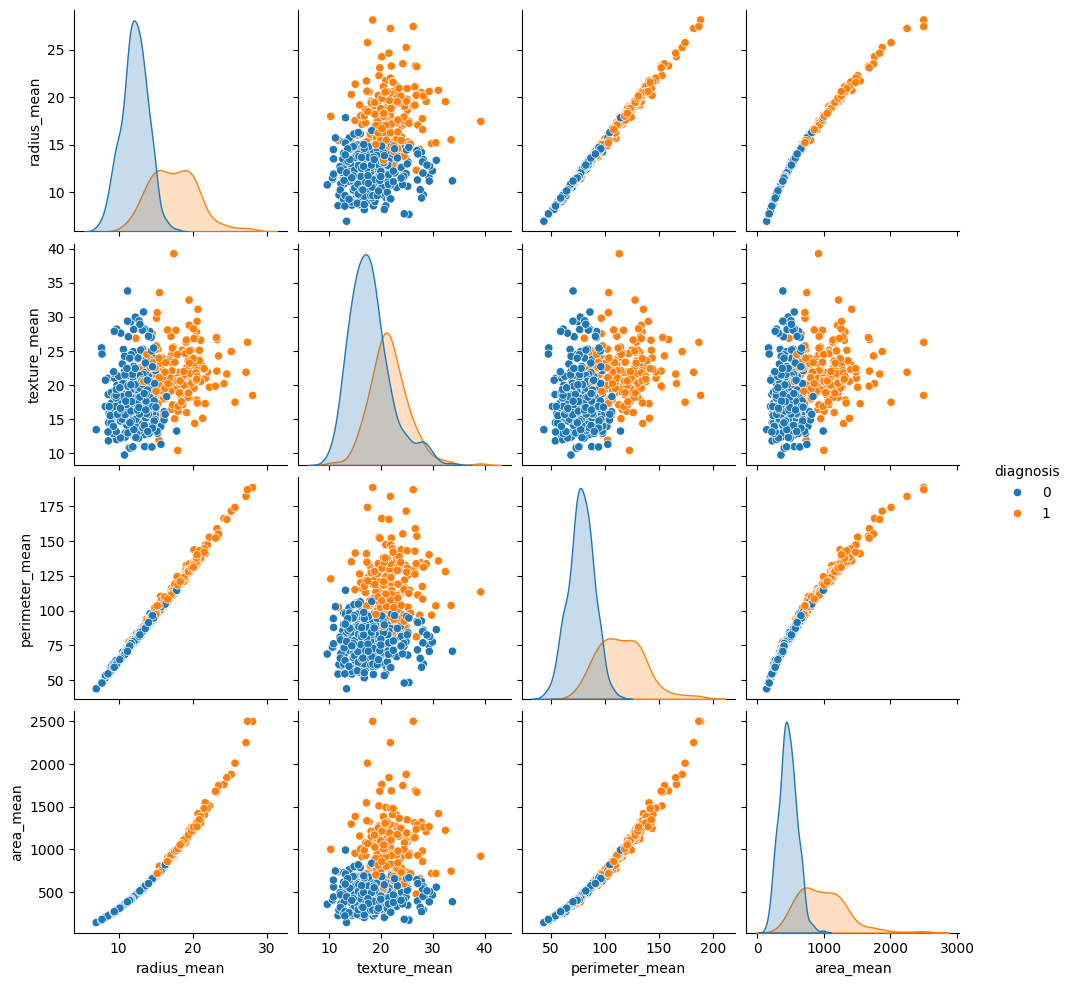

In [32]:
# Visualize feature distribution by diagnosis using pairplot for highly correlated features
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()
